In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Import data and read data imformation

filepath = 'https://raw.githubusercontent.com/naphatsiri/DADS5001-Miniproject/refs/heads/main/Socio_eco_data_original.csv'
df_socio = pd.read_csv(filepath)

df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                3269 non-null   object 
 1   Country Code                3269 non-null   object 
 2   Region                      3269 non-null   object 
 3   Year                        3269 non-null   int64  
 4   Life Expectancy             3118 non-null   float64
 5   Health Expenditure Rate     3126 non-null   float64
 6   Education Expenditure Rate  2216 non-null   float64
 7   Unemployment Rate           3002 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 204.4+ KB


In [10]:
df_socio.head()

,Country Name,Country Code,Region,Year,Life Expectancy,Health Expenditure Rate,Education Expenditure Rate,Unemployment Rate
0,Afghanistan,AFG,South Asia,2001,56.308,NaN,NaN,10.809000
1,Angola,AGO,Sub-Saharan Africa,2001,47.059,4.483516,NaN,4.004000
2,Albania,ALB,Europe & Central Asia,2001,74.288,7.139524,3.4587,18.575001
3,Andorra,AND,Europe & Central Asia,2001,NaN,5.865939,NaN,NaN
4,United Arab Emirates,ARE,Middle East & North Africa,2001,74.544,2.484370,NaN,2.493000


In [11]:
#Clean data process : Select only numerical columns when calculating the median
df_socio.fillna(df_socio.select_dtypes(include='number').median(), inplace=True)

df_socio.head()

,Country Name,Country Code,Region,Year,Life Expectancy,Health Expenditure Rate,Education Expenditure Rate,Unemployment Rate
0,Afghanistan,AFG,South Asia,2001,56.3080,5.892352,4.371465,10.809000
1,Angola,AGO,Sub-Saharan Africa,2001,47.0590,4.483516,4.371465,4.004000
2,Albania,ALB,Europe & Central Asia,2001,74.2880,7.139524,3.458700,18.575001
3,Andorra,AND,Europe & Central Asia,2001,72.1685,5.865939,4.371465,5.920000
4,United Arab Emirates,ARE,Middle East & North Africa,2001,74.5440,2.484370,4.371465,2.493000


In [12]:
#Check data again after fillna witn median on gdp per capita column

df_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                3269 non-null   object 
 1   Country Code                3269 non-null   object 
 2   Region                      3269 non-null   object 
 3   Year                        3269 non-null   int64  
 4   Life Expectancy             3269 non-null   float64
 5   Health Expenditure Rate     3269 non-null   float64
 6   Education Expenditure Rate  3269 non-null   float64
 7   Unemployment Rate           3269 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 204.4+ KB


In [13]:
#Part1_Global : Install ploty
!pip install plotly.express==0.4.1

In [14]:
#Part1 Global : Life expectancy (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Life Expectancy",
                    color_continuous_scale="Viridis",
                    range_color=(0, 90),
                    scope="world",
                    title="Global Life Expectancy (Year) "
                   )
fig.show()

In [15]:
#Part1 Global : Healthcare expenditure (ค่าใช้จ่ายด้านสุขภาพ) (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Health Expenditure Rate",
                    color_continuous_scale="Viridis",
                    range_color=(0, 30),
                    scope="world",
                    title="Global Health Expenditure (% of GDP for each Country)"
                   )
fig.show()

In [16]:
#Part1 Global : Education Expenditure % (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Education Expenditure Rate",
                    color_continuous_scale="Viridis",
                    range_color=(0, 10),
                    scope="world",
                    title="Global Education Expenditure (% of GDP for each Country)"
                   )
fig.show()

In [17]:
#Part1 Global :  Unemployment (Choropleth map)

fig = px.choropleth(df_socio, locations="Country Code", color="Unemployment Rate",
                    color_continuous_scale="Viridis",
                    range_color=(0, 30),
                    scope="world",
                    title="Global Unemployment Rate (% of GDP for each Country)"
                   )
fig.show()

In [18]:
# Assuming 'df_socio' has columns 'Life Expectancy' and 'Country Name'

# Calculate life expectancy
global_avg_life_expectancy = df_socio['Life Expectancy'].mean()
thailand_life_expectancy = df_socio[df_socio['Country Name'] == 'Thailand']['Life Expectancy'].iloc[0]

# Create DataFrame with descriptive names
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Life Expectancy (Years)': [thailand_life_expectancy, global_avg_life_expectancy]
})

# Create bar chart with Plotly
fig = px.bar(data, x='Country', y='Life Expectancy (Years)',
             title='Comparison of Life Expectancy: Thailand vs. Global Average',
             color=['blue', 'green'],
             range_y=[0, 100],
             labels={'Country': 'Country'})

# Add text labels and set y-axis ticks
fig.update_traces(texttemplate=data['Life Expectancy (Years)'].tolist(), textposition='outside')
fig.update_yaxes(dtick=5)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

fig.show()

In [19]:
# Filter data for Thailand
thailand_life_expectancy = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Life Expectancy']]

# Calculate the global average life expectancy over the years
global_average_life_expectancy = df_socio.groupby('Year')['Life Expectancy'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_life_expectancy, x='Year', y='Life Expectancy',
              title='Thailand vs Global Life Expectancy Over Time')

fig.add_scatter(x=thailand_life_expectancy['Year'], y=thailand_life_expectancy['Life Expectancy'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_life_expectancy['Year'], y=global_average_life_expectancy['Life Expectancy'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

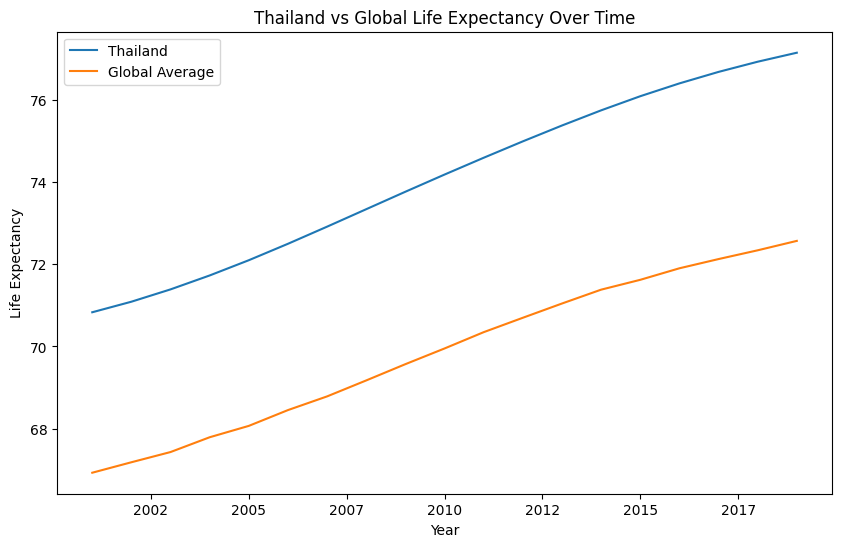

In [20]:
# Filter data for Thailand
thailand_life_expectancy = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Life Expectancy']]

# Calculate the global average life expectancy over the years
global_average_life_expectancy = df_socio.groupby('Year')['Life Expectancy'].mean().reset_index()

# Create a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life Expectancy', data=thailand_life_expectancy, label='Thailand')
sns.lineplot(x='Year', y='Life Expectancy', data=global_average_life_expectancy, label='Global Average')
plt.title('Thailand vs Global Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()

# Configure x-axis to display integer years (no decimals)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # Use %d for integers

plt.show()

In [21]:
#Part2 Thailand vs Global : Bar chart for Healthcare expenditure

# Calculate the global average healthcare expenditure
global_average_healthcare_expenditure = df_socio['Health Expenditure Rate'].mean()

# Get the healthcare expenditure for Thailand
thailand_healthcare_expenditure = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Health Expenditure Rate'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Health Expenditure Rate': [thailand_healthcare_expenditure, global_average_healthcare_expenditure]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Health Expenditure Rate',
             title='Comparison of Health Expenditure : Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 10],
             text_auto='.2f',
             text='Health Expenditure Rate',
             labels={'Health Expenditure Rate': 'Health Expenditure Rate', 'Country': 'Country'})

fig.show()

In [22]:
# Filter data for Thailand
thailand_health_expenditure = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Health Expenditure Rate']]

# Calculate the global average life expectancy over the years
global_average_health_expenditure = df_socio.groupby('Year')['Health Expenditure Rate'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_health_expenditure, x='Year', y='Health Expenditure Rate',
              title='Thailand vs Global Health Expenditure Over Time')

fig.add_scatter(x=thailand_health_expenditure['Year'], y=thailand_health_expenditure['Health Expenditure Rate'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_health_expenditure['Year'], y=global_average_health_expenditure['Health Expenditure Rate'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

In [23]:
#Part2 Thailand vs Global : Bar chart for Education Expenditure

# Calculate the global average Education Expenditure
global_average_education_expenditure = df_socio['Education Expenditure Rate'].mean()

# Get the Education Expenditure for Thailand
thailand_education_expenditure = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Education Expenditure Rate'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Education Expenditure Rate': [thailand_education_expenditure, global_average_education_expenditure]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Education Expenditure Rate',
             title='Comparison of Education Expenditure : Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 10],
             text_auto='.2f',
             text='Education Expenditure Rate',
             labels={'Education Expenditure Rate': 'Education Expenditure Rate', 'Country': 'Country'})


fig.update_yaxes(dtick=5)
fig.show()

In [24]:
# Filter data for Thailand
thailand_education_expenditure = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Education Expenditure Rate']]

# Calculate the global average education expenditure over the years
global_average_education_expenditure = df_socio.groupby('Year')['Education Expenditure Rate'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_education_expenditure, x='Year', y='Education Expenditure Rate',
              title='Thailand vs Global Education Expenditure Over Time')

fig.add_scatter(x=thailand_education_expenditure['Year'], y=thailand_education_expenditure['Education Expenditure Rate'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_education_expenditure['Year'], y=global_average_education_expenditure['Education Expenditure Rate'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

In [25]:
#Part2 Thailand vs Global : Bar chart for Unemployment rate

# Calculate the global average Unemployment rate
global_average_unemployment_rate = df_socio['Unemployment Rate'].mean()

# Get the Unemployment rate for Thailand
thailand_unemployment_rate = df_socio.loc[df_socio['Country Name'] == 'Thailand', 'Unemployment Rate'].iloc[0]

# Create a DataFrame for the bar chart
data = pd.DataFrame({
    'Country': ['Thailand', 'Global Average'],
    'Unemployment rate %%': [thailand_unemployment_rate, global_average_unemployment_rate]
})

# Create the bar chart using plotly.express
fig = px.bar(data, x='Country', y='Unemployment rate %%',
             title='Comparison of Unemployment rate  : Thailand vs. Global Average',
             color=['blue','green'],
             range_y=[0, 10],
             text_auto='.2f',
             text='Unemployment rate %%',
             labels={'Unemployment rate %%': 'Unemployment Rate', 'Country': 'Country'})

fig.update_yaxes(dtick=5)
fig.show()

In [26]:
# Filter data for Thailand
thailand_unemployment_rate = df_socio[df_socio['Country Name'] == 'Thailand'][['Year', 'Unemployment Rate']]

# Calculate the global average unemployment rate over the years
global_average_unemployment_rate = df_socio.groupby('Year')['Unemployment Rate'].mean().reset_index()

# Create a line graph using plotly.express
fig = px.line(thailand_unemployment_rate, x='Year', y='Unemployment Rate',
              title='Thailand vs Global Unemployment Rate Over Time')

fig.add_scatter(x=thailand_unemployment_rate['Year'], y=thailand_unemployment_rate['Unemployment Rate'],
                mode='lines', name='Thailand', line=dict(color='blue'))

fig.add_scatter(x=global_average_unemployment_rate['Year'], y=global_average_unemployment_rate['Unemployment Rate'],
                mode='lines', name='Global Average', line=dict(color='green'))

fig.show()

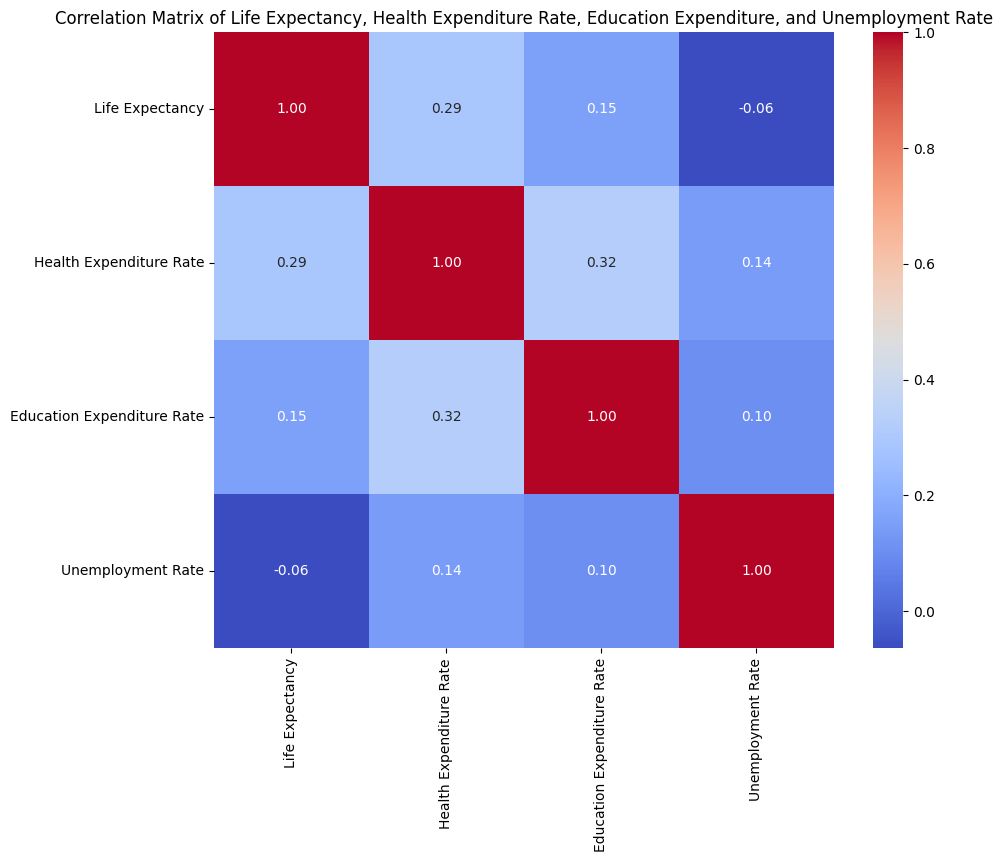

In [27]:
# Select the columns for the correlation matrix
columns = ['Life Expectancy', 'Health Expenditure Rate', 'Education Expenditure Rate', 'Unemployment Rate']
df_corr = df_socio[columns]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Life Expectancy, Health Expenditure Rate, Education Expenditure, and Unemployment Rate')
plt.show()

In [28]:
merged_df = pd.read_csv('https://raw.githubusercontent.com/naphatsiri/DADS5001-Miniproject/refs/heads/main/socio-eco%20and%20gdp%20per%20capita%20(merged)%20280967%2011.08.csv')
merged_df.head()


,Country Name,Country Code,Region,Year,Life Expectancy,Health Expenditure Rate,Education Expenditure Rate,Unemployment Rate,gdp per capita
0,Afghanistan,AFG,South Asia,2001,56.3080,5.892352,4.371465,10.809000,NaN
1,Angola,AGO,Sub-Saharan Africa,2001,47.0590,4.483516,4.371465,4.004000,527.333529
2,Albania,ALB,Europe & Central Asia,2001,74.2880,7.139524,3.458700,18.575001,1281.659826
3,Andorra,AND,Europe & Central Asia,2001,72.1685,5.865939,4.371465,5.920000,22970.512210
4,United Arab Emirates,ARE,Middle East & North Africa,2001,74.5440,2.484370,4.371465,2.493000,31280.755860


In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                3269 non-null   object 
 1   Country Code                3269 non-null   object 
 2   Region                      3269 non-null   object 
 3   Year                        3269 non-null   int64  
 4   Life Expectancy             3269 non-null   float64
 5   Health Expenditure Rate     3269 non-null   float64
 6   Education Expenditure Rate  3269 non-null   float64
 7   Unemployment Rate           3269 non-null   float64
 8   gdp per capita              3227 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 230.0+ KB


In [30]:
# Calculate the median of 'GDP per capita'
median_gdp_per_capita = merged_df['gdp per capita'].median()

# Fill NaN values in 'GDP per capita' with the median
merged_df['gdp per capita'].fillna(median_gdp_per_capita, inplace=True)

# Print the updated DataFrame
print(merged_df.info())
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                3269 non-null   object 
 1   Country Code                3269 non-null   object 
 2   Region                      3269 non-null   object 
 3   Year                        3269 non-null   int64  
 4   Life Expectancy             3269 non-null   float64
 5   Health Expenditure Rate     3269 non-null   float64
 6   Education Expenditure Rate  3269 non-null   float64
 7   Unemployment Rate           3269 non-null   float64
 8   gdp per capita              3269 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 230.0+ KB
None


,Country Name,Country Code,Region,Year,Life Expectancy,Health Expenditure Rate,Education Expenditure Rate,Unemployment Rate,gdp per capita
0,Afghanistan,AFG,South Asia,2001,56.3080,5.892352,4.371465,10.809000,4444.816511
1,Angola,AGO,Sub-Saharan Africa,2001,47.0590,4.483516,4.371465,4.004000,527.333529
2,Albania,ALB,Europe & Central Asia,2001,74.2880,7.139524,3.458700,18.575001,1281.659826
3,Andorra,AND,Europe & Central Asia,2001,72.1685,5.865939,4.371465,5.920000,22970.512210
4,United Arab Emirates,ARE,Middle East & North Africa,2001,74.5440,2.484370,4.371465,2.493000,31280.755860


In [31]:
#GDP per capita vs. Life Expectancy (Scatter plot)

fig = px.scatter(merged_df, x='gdp per capita', y='Life Expectancy',
                 title='GDP per capita vs. Life Expectancy',
                 hover_data=['Country Name'],
                 trendline="ols",
                 trendline_color_override='red')
fig.show()
#กราฟนี้แสดงความสัมพันธ์ระหว่าง GDP ต่อหัวของแต่ละประเทศกับอายุขัยเฉลี่ยของประชากร
#กราฟนี้แสดงเห็นถึงความสัมพันธ์ที่น่าสนใจระหว่างความมั่งคั่งของประเทศและสุขภาพของประชากร
#trendline ordinary least squares ใช้แสดงแนวโน้มโดยรวมของข้อมูล



In [32]:
#GDP per capita vs. Health Expenditure (Scatter plot)
fig = px.scatter(merged_df, x='gdp per capita', y='Health Expenditure Rate',
                 title='GDP Per Capita vs. Health Expenditure Rate',
                 hover_data=['Country Name'],
                 trendline="ols",
                 trendline_color_override='red')
fig.show()
#กราฟนี้แสดงความสัมพันธ์ระหว่าง GDP ต่อหัวของแต่ละประเทศกับสัดส่วนการใช้จ่ายด้านสุขภาพ

In [33]:
#GDP per capita vs. Education Expenditure (Scatter plot)
fig = px.scatter(merged_df, x='gdp per capita', y='Education Expenditure Rate',
                 title='GDP Per Capita vs. Education Expenditure Rate',
                 hover_data=['Country Name'],
                 trendline="ols",
                 trendline_color_override='red')
fig.show()
#กราฟนี้แสดงความสัมพันธ์ระหว่าง GDP ต่อหัวของแต่ละประเทศกับสัดส่วนการใช้จ่ายด้านการศึกษา

In [34]:
#GDP per capita vs. Unemployment (Scatter plot)
fig = px.scatter(merged_df, x='gdp per capita', y='Unemployment Rate',
                 title='GDP Per Capita vs. Unemployment Rate',
                 hover_data=['Country Name'],
                 trendline="ols",
                 trendline_color_override='red')
fig.show()

#กราฟนี้แสดงความสัมพันธ์ระหว่างรายได้เฉลี่ยต่อหัวของประชากรในแต่ละประเทศ (GDP ต่อหัว) กับอัตราการว่างงาน

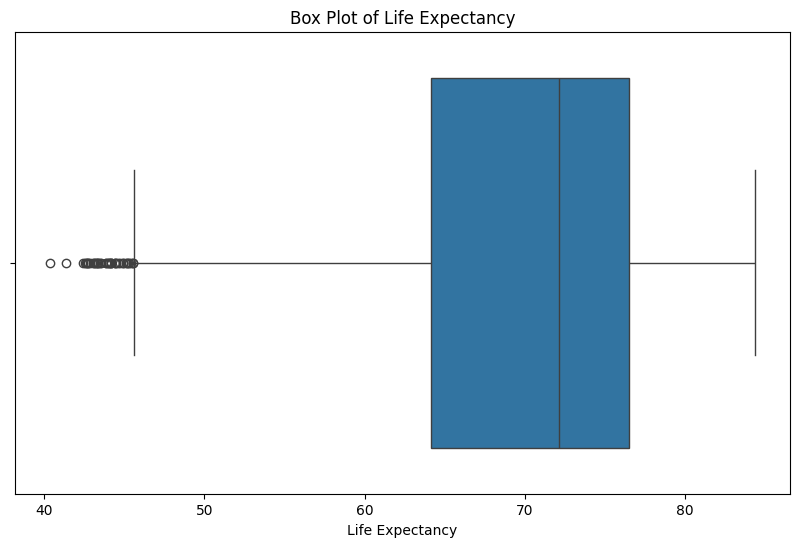

In [35]:
# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Life Expectancy', data=df_socio)
plt.title('Box Plot of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()


In [36]:
# prompt: วิเคราะห์ความสัมพันธ์เพื่อสร้าง bubble chart

# Analyze the relationship between GDP per capita, life expectancy, and health expenditure to create a bubble chart
fig = px.scatter(merged_df, x="gdp per capita", y="Life Expectancy",
                 size="Health Expenditure Rate", color="Country Name",
                 hover_name="Country Name", log_x=True, size_max=60,
                 title="Relationship between GDP per capita, Life Expectancy, and Health Expenditure Rate")
fig.show()

#Insights:
# 1) Wealthier countries (farther to the right) may tend to have longer life expectancies, but those with more efficient healthcare systems (smaller bubbles) may achieve good outcomes without spending as much.
# 2) Countries with larger bubbles might signal inefficiencies if they spend a lot on healthcare but don't have proportionately high life expectancy.
# 3) In summary, the bubble chart allows for a nuanced view of the relationship between economic prosperity, health outcomes, and healthcare investment.

In [37]:
fig = px.scatter(merged_df, x="gdp per capita", y="Life Expectancy",
                    size="Health Expenditure Rate",
                    color=['red' if c == 'Thailand' else 'blue' for c in merged_df['Country Name']],
                    hover_name="Country Name", log_x=True, size_max=60,
                    title="Relationship between GDP per capita, Life Expectancy, and Health Expenditure Rate")
fig.show()

In [38]:

fig = px.scatter(merged_df, x="gdp per capita", y="Health Expenditure Rate",
                 size="Education Expenditure Rate", color="Country Name",
                 hover_name="Country Name", log_x=True, size_max=60,
                 title="Relationship between GDP per capita, Health Expenditure Rate, and Education Expenditure Rate")
fig.show()

#Insights:
#Wealthy, high-spending nations: Countries farther to the right (high GDP per capita) with larger bubbles (high education spending) and higher positions (high health spending) might indicate nations that prioritize both health and education alongside their economic prosperity.
#Efficient spenders: Smaller bubbles at the same GDP per capita and health expenditure levels may suggest countries that achieve similar outcomes in health and education with less spending.

#In summary:This bubble chart allows you to assess the relationship between a country's economic strength (GDP per capita), healthcare priorities (health expenditure %), and educational investment (education expenditure %), giving insight into national strategies, priorities, and potential inefficiencies or trade-offs between education and health spending.

In [39]:
fig = px.scatter(merged_df, x="gdp per capita", y="Health Expenditure Rate",
                 size="Education Expenditure Rate",
                 color=['red' if c == 'Thailand' else 'blue' for c in merged_df['Country Name']],
                 hover_name="Country Name", log_x=True, size_max=60,
                 title="Relationship between GDP per capita, Health Expenditure Rate, and Education Expenditure Rate")
fig.show()